In [2]:
import pandas as pd

df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
import numpy as np

l = df.values

x = l[:, 0:-1]
y = l[:, [-1]]

print(l.shape)
print(x.shape)
print(y.shape)
print(l)

(768, 9)
(768, 8)
(768, 1)
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(12, input_shape=(x.shape[1],), activation='relu'))
model.add(Dense(x.shape[1], activation='relu'))
model.add(Dense(y.shape[1], activation='sigmoid'))
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [17]:
training = model.fit(x, y, epochs=150, batch_size=10, 
                     validation_split=0.2, verbose=0)

In [10]:
model.evaluate(x, y)

24/24 [==============================] - 0s 4ms/step - loss: 0.5197 - accuracy: 0.7721


[0.5197358131408691, 0.7721354365348816]

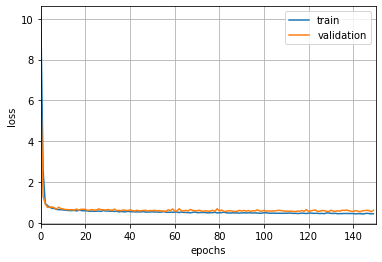

In [11]:
import matplotlib.pyplot as plt

plt.xlabel('epochs')
plt.ylabel('loss')
plt.xlim(0,150)
plt.grid()

plt.plot(training.history['loss'], label='train')
plt.plot(training.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.show()

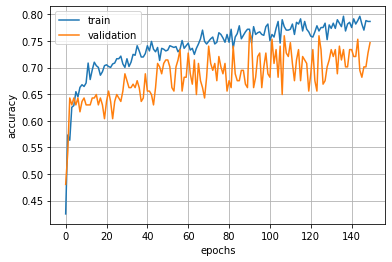

In [12]:
import matplotlib.pyplot as plt

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(training.history['accuracy'], label='train')
plt.plot(training.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()